In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataValue = pd.read_csv('Arquivo_Valorizacao_Ambiental.csv')

## Detection of Outliers

In [3]:
def outLiers(dataFrame, listOut, extreme):
    q1 = dataFrame.quantile(.25)
    q3 = dataFrame.quantile(.75)
    iq = q3 - q1
    lowExtremePoint = q1 - 3 * iq
    lowPoint = q1 - 1.5 * iq
    highValue = q3 + 1.5 * iq
    highExtremeValue = q3 + 3 * iq
    
    for item in dataFrame:
        if item > highValue and  item < highExtremeValue:
            listOut.append(item)
        elif(item > highExtremeValue):
            extreme.append(item)    
    return listOut, extreme


def rmOut(dataframe, outList, extreme):
    data = []
    for i in dataframe:
        if i not in (outList and extreme):
            data.append(i)
    return data
        

def cleanData(data, dataFrame):
    lista = []
    for i in dataFrame:
        if data[i] == i:
            lista.append(i)


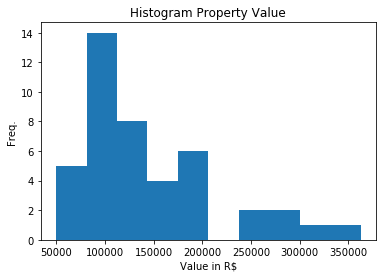

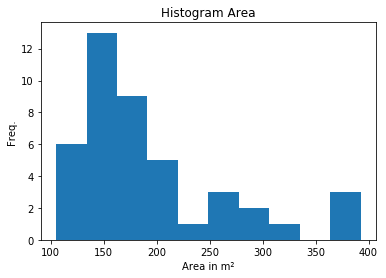

In [4]:
plt.hist(dataValue['Valor'])
plt.title('Histogram Property Value')
plt.ylabel('Freq.')
plt.xlabel('Value in R$')

plt.show()
plt.clf()

plt.hist(dataValue['Area'])
plt.title('Histogram Area')
plt.ylabel('Freq.')
plt.xlabel('Area in m²')

plt.show()
plt.clf()

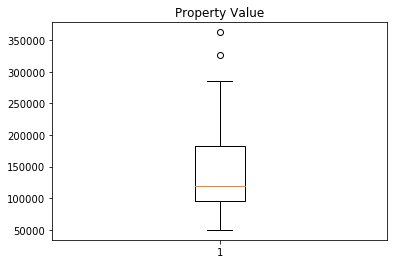

In [5]:
plt.boxplot(dataValue['Valor'])
plt.title('Property Value')
plt.show()
plt.clf()

In [6]:
print('Basic Statistcs')
print(dataValue['Valor'].describe())

Basic Statistcs
count        43.000000
mean     144618.255814
std       72084.680047
min       50000.000000
25%       95000.000000
50%      120000.000000
75%      182500.000000
max      362400.000000
Name: Valor, dtype: float64


In [7]:
outValue = []
extValue = []
outLiers(dataValue['Valor'], outValue, extValue)


([325669, 362400], [])

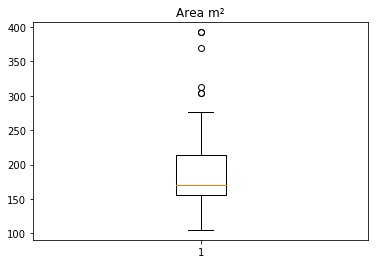

In [8]:
plt.boxplot(dataValue['Area'])
plt.title('Area m²')
plt.show()
plt.clf()

In [9]:
dataValue['Area'].describe()

count     43.000000
mean     195.613721
std       72.616871
min      105.000000
25%      155.500000
50%      171.000000
75%      213.685000
max      392.400000
Name: Area, dtype: float64

In [10]:
outArea = []
extremeArea = []
outLiers(dataValue['Area'], outArea, extremeArea)


([312.81999999999999, 304.35000000000002, 304.35000000000002, 370.0],
 [392.39999999999998, 392.39999999999998])

In [11]:
outValue = []
extValue = []
outLiers(dataValue['Valor'], outValue, extValue)

([325669, 362400], [])

In [12]:
#remove outliers and extremepoints
dtValue = pd.Series(rmOut(dataValue['Valor'],outValue,extValue))

In [13]:
#remove outliers and extremepoints
dtArea =  pd.Series(rmOut(dataValue['Area'],outArea, extremeArea))

In [14]:
dtValue.describe()

count        43.000000
mean     144618.255814
std       72084.680047
min       50000.000000
25%       95000.000000
50%      120000.000000
75%      182500.000000
max      362400.000000
dtype: float64

In [15]:
cluster = pd.DataFrame(pd.cut(dtValue, 6, labels=False))


In [16]:
dataValue.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV200m
0,1,160000,167.81,1,5,100,100,294,100,1
1,2,67000,128.80,1,6,1,1,1505,100,1
2,3,190000,217.37,1,8,100,1,251,1,100
3,4,110000,180.00,12,4,100,1,245,1,1
4,5,70000,120.00,15,3,100,1,956,100,1


In [17]:
faixaValor = pd.DataFrame(pd.concat([dtValue,\
                                     pd.Series(dataValue['Area']),\
                                     pd.Series(dataValue['IA']), \
                                     pd.Series(dataValue['Vista']), \
                                     pd.Series(dataValue['DistBM']),
                                     pd.Series(dataValue['Semruido']), \
                                     pd.Series(dataValue['AV200m']), \
                                     cluster], axis=1)).dropna()
faixaValor.columns = ['Property Value', 'Area','IA','Vista','DistBm','Semruido', 'AV200m','Cluster']

In [18]:
faixaValor.head()

,Property Value,Area,IA,Vista,DistBm,Semruido,AV200m,Cluster
0,160000,167.81,1,100,294,100,1,2
1,67000,128.80,1,1,1505,100,1,0
2,190000,217.37,1,1,251,1,100,2
3,110000,180.00,12,1,245,1,1,1
4,70000,120.00,15,1,956,100,1,0


## Scatter Plot for two variables

Before and after of remove outliers

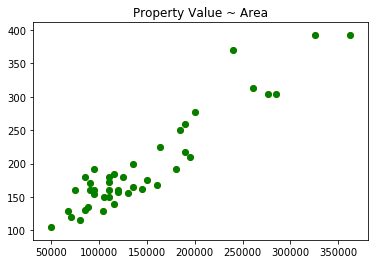

In [19]:
plt.scatter(dataValue['Valor'], dataValue['Area'], color="orange")
plt.scatter(faixaValor['Property Value'],faixaValor['Area'], color='green')
plt.title('Property Value ~ Area')
plt.show()